In [1]:
from manim import *
import networkx as nx
from networkx.generators import gnp_random_graph
import numpy as np

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.3

In [2]:
%%manim -qm MLAndDL4

class MLAndDL4(ThreeDScene):
    def construct(self):
        # Theta * X + Beta
        linear_func = MathTex(r"h_\Theta(X) = \sigma(\Theta X + \mathrm{B})")
        whole_op = MathTex(r"""
            h_\Theta(X) = 
            \sigma(\begin{bmatrix}
            \Theta^{(0)}_{1, 1} & \Theta^{(0)}_{1, 2} & \Theta^{(0)}_{1, 3}\\
            \Theta^{(0)}_{2, 1} & \Theta^{(0)}_{2, 2} & \Theta^{(0)}_{2, 3}\\
            \Theta^{(0)}_{3, 1} & \Theta^{(0)}_{3, 2} & \Theta^{(0)}_{3, 3}\\
            \Theta^{(0)}_{4, 1} & \Theta^{(0)}_{4, 2} & \Theta^{(0)}_{4, 3}\\
            \end{bmatrix}
            \cdot
            \begin{bmatrix}
            X^{(0)}_1 & X^{(1)}_1 & \cdots & X^{(m - 1)}_1 \\
            X^{(0)}_2 & X^{(1)}_2 & \cdots & X^{(m - 1)}_2 \\
            X^{(0)}_3 & X^{(1)}_3 & \cdots & X^{(m - 1)}_3 \\
            \end{bmatrix}
            +
            \begin{bmatrix}
            \mathrm{B}^{(0)}_{1, 0} \\
            \mathrm{B}^{(0)}_{2, 0} \\
            \mathrm{B}^{(0)}_{3, 0} \\
            \mathrm{B}^{(0)}_{4, 0} \\
            \end{bmatrix})
        """)

        edges = []
        partitions = []
        c = 0
        layers = [5, 4, 4, 3, 2, 3, 4, 4, 5]  # the number of neurons in each layer

        for n_nodes in layers:
            partitions.append(list(range(c + 1, c + n_nodes + 1)))
            c += n_nodes

        # create the edges of neural network
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        # create the nodes of the neural network
        vertices = np.arange(1, sum(layers) + 1)

        # note graph nodes start from 1 in this case
        graph = Graph(
            vertices,
            edges,
            layout='partite',
            partitions=partitions,
            layout_scale=5,
            vertex_config={
                'radius': 0.2
            },
            edge_config={
                'buff': 1
            }
        )

        # modify each nodes fill
        for node in graph.vertices:
            graph[node].set_fill(WHITE, opacity=0.0)
            graph[node].set_stroke('#1d58e0', opacity=1, width=5)

        dot = Dot()

        
        self.play(Write(linear_func))
        self.wait(1)
        self.play(ReplacementTransform(linear_func, whole_op))
        self.wait(1)
        self.play(ReplacementTransform(whole_op, dot))
        self.wait(1)
        self.play(ReplacementTransform(dot, graph))
        self.wait(3)

In [3]:
%%manim -qm Graph6

class Graph6(ThreeDScene):
    def construct(self):
        edges = []
        partitions = []
        c = 0
        layers = [5, 4, 4, 3, 2, 3, 4, 4, 5]  # the number of neurons in each layer

        for n_nodes in layers:
            partitions.append(list(range(c + 1, c + n_nodes + 1)))
            c += n_nodes

        # create the edges of neural network
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        # create the nodes of the neural network
        vertices = np.arange(1, sum(layers) + 1)

        # note graph nodes start from 1 in this case
        graph = Graph(
            vertices,
            edges,
            layout='circular',
            layout_scale=0.0625,
            vertex_config={
                'radius': 0.2
            },
            edge_config={
                'buff': 1
            }
        )

        # modify each nodes fill
        for node in graph.vertices:
            graph[node].set_fill(WHITE, opacity=0.0)
            graph[node].set_stroke('#ffffff', opacity=1, width=5)

        dot = Dot()

        self.play(Create(dot))
        self.play(ReplacementTransform(dot, graph))
        self.play(graph.animate.change_layout('partite', partitions=partitions, layout_scale=5))
        # self.wait(1)

        # animate the nodes of the first layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]], run_time=0.25)


        # animate the edges of the first layer and remove animation of nodes in first layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        (2, 6), (2, 7), (2, 8), (2, 9),
        (3, 6), (3, 7), (3, 8), (3, 9),
        (4, 6), (4, 7), (4, 8), (4, 9),
        (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.25)
        
        # animate the nodes of the second layer and remove animation of edges in the first layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        (2, 6), (2, 7), (2, 8), (2, 9),
        (3, 6), (3, 7), (3, 8), (3, 9),
        (4, 6), (4, 7), (4, 8), (4, 9),
        (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.25)


        # animate the edges of the second layer and remove animation of nodes in second layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        (7, 10), (7, 11), (7, 12), (7, 13),
        (8, 10), (8, 11), (8, 12), (8, 13),
        (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.25)

        # animate the nodes of the third layer and remove animation of edges in the second layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        (7, 10), (7, 11), (7, 12), (7, 13),
        (8, 10), (8, 11), (8, 12), (8, 13),
        (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.25)


        # animate the edges of the third layer and remove animation of nodes in third layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(10, 14), (10, 15), (10, 16), 
        (11, 14), (11, 15), (11, 16),
        (12, 14), (12, 15), (12, 16),
        (13, 14), (13, 15), (13, 16),]], run_time=0.25)

        # animate the nodes of the 4th layer and remove animation of edges in the third layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(10, 14), (10, 15), (10, 16), 
        (11, 14), (11, 15), (11, 16),
        (12, 14), (12, 15), (12, 16),
        (13, 14), (13, 15), (13, 16),]], run_time=0.25)


        # animate the edges of the 4th layer and remove animation of nodes in 4th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(14, 17), (14, 18), 
        (15, 17), (15, 18),
        (16, 17), (16, 18),]], run_time=0.25)

        # animate the nodes of the 5th layer and remove animation of edges in the 4th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(14, 17), (14, 18), 
        (15, 17), (15, 18),
        (16, 17), (16, 18),]], run_time=0.25)


        # animate the edges of the 5th layer and remove animation of nodes in 5th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(17, 19), (17, 20), (17, 21),
        (18, 19), (18, 20), (18, 21),]], run_time=0.25)

        # animate the nodes of the 6th layer and remove animation of edges in the 5th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(17, 19), (17, 20), (17, 21),
        (18, 19), (18, 20), (18, 21),]], run_time=0.25)


        # animate the edges of the 6th layer and remove animation of nodes in 6th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        (20, 22), (20, 23), (20, 24), (20, 25),
        (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.25)

        # animate the nodes of the 7th layer and remove animation of edges in the 6th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        (20, 22), (20, 23), (20, 24), (20, 25),
        (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.25)


        # animate the edges of the 7th layer and remove animation of nodes in 7th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        (23, 26), (23, 27), (23, 28), (23, 29),
        (24, 26), (24, 27), (24, 28), (24, 29),
        (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.25)

        # animate the nodes of the 8th layer and remove animation of edges in the 7th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        (23, 26), (23, 27), (23, 28), (23, 29),
        (24, 26), (24, 27), (24, 28), (24, 29),
        (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.25)


        # animate the edges of the 8thth layer and remove animation of nodes in 8th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.25)

        # animate the nodes of the 9th layer and remove animation of edges in the 8th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]] + 
        [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.25)


        # remove animation of nodes in 9th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]], run_time=0.25)


In [4]:
%%manim -qm Graph7

class Graph7(ThreeDScene):
    def construct(self):
        edges = []
        partitions = []
        c = 0
        layers = [5, 4, 4, 3, 2, 3, 4, 4, 5]  # the number of neurons in each layer

        for n_nodes in layers:
            partitions.append(list(range(c + 1, c + n_nodes + 1)))
            c += n_nodes

        # create the edges of neural network
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        # create the nodes of the neural network
        vertices = np.arange(1, sum(layers) + 1)
        print(vertices)
        print(edges)

        # note graph nodes start from 1 in this case
        # initially also our graph will just be a single node then
        # progress to add more nodes
        graph = Graph(
            [1],
            [],
            layout_scale=5,
            vertex_config={
                'fill_color': BLUE,
                'fill_opacity': 0,
                'radius': 0.2,
                'stroke_width': 5,
                'stroke_color': WHITE
            },
        )

        self.play(Create(graph))
        # add the rest of the vertices which are from 2 to 34
        self.play(graph.animate.add_vertices(*vertices[vertices > 1], vertex_config={
                'fill_color': BLUE,
                'fill_opacity': 0,
                'radius': 0.2,
                'stroke_width': 5,
                'stroke_color': WHITE
            }))
        self.play(graph.animate.change_layout('partite', partitions=partitions, layout_scale=5))
        self.wait(1)

        # # animate the nodes of the first layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]], run_time=0.25)


        # # animate the edges of the first layer and remove animation of nodes in first layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        # (2, 6), (2, 7), (2, 8), (2, 9),
        # (3, 6), (3, 7), (3, 8), (3, 9),
        # (4, 6), (4, 7), (4, 8), (4, 9),
        # (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.25)
        
        # # animate the nodes of the second layer and remove animation of edges in the first layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        # (2, 6), (2, 7), (2, 8), (2, 9),
        # (3, 6), (3, 7), (3, 8), (3, 9),
        # (4, 6), (4, 7), (4, 8), (4, 9),
        # (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.25)


        # # animate the edges of the second layer and remove animation of nodes in second layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        # (7, 10), (7, 11), (7, 12), (7, 13),
        # (8, 10), (8, 11), (8, 12), (8, 13),
        # (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.25)

        # # animate the nodes of the third layer and remove animation of edges in the second layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        # (7, 10), (7, 11), (7, 12), (7, 13),
        # (8, 10), (8, 11), (8, 12), (8, 13),
        # (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.25)


        # # animate the edges of the third layer and remove animation of nodes in third layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(10, 14), (10, 15), (10, 16), 
        # (11, 14), (11, 15), (11, 16),
        # (12, 14), (12, 15), (12, 16),
        # (13, 14), (13, 15), (13, 16),]], run_time=0.25)

        # # animate the nodes of the 4th layer and remove animation of edges in the third layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(10, 14), (10, 15), (10, 16), 
        # (11, 14), (11, 15), (11, 16),
        # (12, 14), (12, 15), (12, 16),
        # (13, 14), (13, 15), (13, 16),]], run_time=0.25)


        # # animate the edges of the 4th layer and remove animation of nodes in 4th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(14, 17), (14, 18), 
        # (15, 17), (15, 18),
        # (16, 17), (16, 18),]], run_time=0.25)

        # # animate the nodes of the 5th layer and remove animation of edges in the 4th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(14, 17), (14, 18), 
        # (15, 17), (15, 18),
        # (16, 17), (16, 18),]], run_time=0.25)


        # # animate the edges of the 5th layer and remove animation of nodes in 5th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(17, 19), (17, 20), (17, 21),
        # (18, 19), (18, 20), (18, 21),]], run_time=0.25)

        # # animate the nodes of the 6th layer and remove animation of edges in the 5th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(17, 19), (17, 20), (17, 21),
        # (18, 19), (18, 20), (18, 21),]], run_time=0.25)


        # # animate the edges of the 6th layer and remove animation of nodes in 6th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        # (20, 22), (20, 23), (20, 24), (20, 25),
        # (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.25)

        # # animate the nodes of the 7th layer and remove animation of edges in the 6th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        # (20, 22), (20, 23), (20, 24), (20, 25),
        # (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.25)


        # # animate the edges of the 7th layer and remove animation of nodes in 7th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        # (23, 26), (23, 27), (23, 28), (23, 29),
        # (24, 26), (24, 27), (24, 28), (24, 29),
        # (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.25)

        # # animate the nodes of the 8th layer and remove animation of edges in the 7th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        # (23, 26), (23, 27), (23, 28), (23, 29),
        # (24, 26), (24, 27), (24, 28), (24, 29),
        # (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.25)


        # # animate the edges of the 8thth layer and remove animation of nodes in 8th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        # (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        # (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        # (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.25)

        # # animate the nodes of the 9th layer and remove animation of edges in the 8th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        # (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        # (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        # (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.25)


        # # remove animation of nodes in 9th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]], run_time=0.25)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
[(1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 10), (7, 10), (8, 10), (9, 10), (6, 11), (7, 11), (8, 11), (9, 11), (6, 12), (7, 12), (8, 12), (9, 12), (6, 13), (7, 13), (8, 13), (9, 13), (10, 14), (11, 14), (12, 14), (13, 14), (10, 15), (11, 15), (12, 15), (13, 15), (10, 16), (11, 16), (12, 16), (13, 16), (14, 17), (15, 17), (16, 17), (14, 18), (15, 18), (16, 18), (17, 19), (18, 19), (17, 20), (18, 20), (17, 21), (18, 21), (19, 22), (20, 22), (21, 22), (19, 23), (20, 23), (21, 23), (19, 24), (20, 24), (21, 24), (19, 25), (20, 25), (21, 25), (22, 26), (23, 26), (24, 26), (25, 26), (22, 27), (23, 27), (24, 27), (25, 27), (22, 28), (23, 28), (24, 28), (25, 28), (22, 29), (23, 29), (24, 29), (25, 29), (26, 30), (27, 30), (28, 30), (29, 30), (26, 31), (27, 31), (28, 31), 

[(1, 6),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6),
 (1, 7),
 (2, 7),
 (3, 7),
 (4, 7),
 (5, 7),
 (1, 8),
 (2, 8),
 (3, 8),
 (4, 8),
 (5, 8),
 (1, 9),
 (2, 9),
 (3, 9),
 (4, 9),
 (5, 9),
 (6, 10),
 (7, 10),
 (8, 10),
 (9, 10),
 (6, 11),
 (7, 11),
 (8, 11),
 (9, 11),
 (6, 12),
 (7, 12),
 (8, 12),
 (9, 12),
 (6, 13),
 (7, 13),
 (8, 13),
 (9, 13),
 (10, 14),
 (11, 14),
 (12, 14),
 (13, 14),
 (10, 15),
 (11, 15),
 (12, 15),
 (13, 15),
 (10, 16),
 (11, 16),
 (12, 16),
 (13, 16),
 (14, 17),
 (15, 17),
 (16, 17),
 (14, 18),
 (15, 18),
 (16, 18),
 (17, 19),
 (18, 19),
 (17, 20),
 (18, 20),
 (17, 21),
 (18, 21),
 (19, 22),
 (20, 22),
 (21, 22),
 (19, 23),
 (20, 23),
 (21, 23),
 (19, 24),
 (20, 24),
 (21, 24),
 (19, 25),
 (20, 25),
 (21, 25),
 (22, 26),
 (23, 26),
 (24, 26),
 (25, 26),
 (22, 27),
 (23, 27),
 (24, 27),
 (25, 27),
 (22, 28),
 (23, 28),
 (24, 28),
 (25, 28),
 (22, 29),
 (23, 29),
 (24, 29),
 (25, 29),
 (26, 30),
 (27, 30),
 (28, 30),
 (29, 30),
 (26, 31),
 (27, 31),
 (28, 31),
 (29, 31),
 (26, 32),
 (27, 32),
 (28, 32),
 (29, 32),
 (26, 33),
 (27, 33),
 (28, 33),
 (29, 33),
 (26, 34),
 (27, 34),
 (28, 34),
 (29, 34)]

In [5]:
%%manim -qm Graph8

class Graph8(ThreeDScene):
    def construct(self):
        edges = []
        partitions = []
        c = 0
        layers = [5, 4, 4, 3, 2, 3, 4, 4, 5]  # the number of neurons in each layer

        for n_nodes in layers:
            partitions.append(list(range(c + 1, c + n_nodes + 1)))
            c += n_nodes

        # create the edges of neural network
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        # create the nodes of the neural network
        vertices = np.arange(1, sum(layers) + 1)

        # note graph nodes start from 1 in this case
        graph = Graph(
            vertices,
            edges,
            layout='circular',
            layout_scale=5,
            vertex_config={
                'fill_color': BLUE,
                'fill_opacity': 0,
                'radius': 0.2,
                'stroke_width': 5,
                'stroke_color': WHITE,
                'stroke_opacity': 1
            },
            edge_config={
                'stroke_width': 2.5,
                'stroke_color': ORANGE,
                'stroke_opacity': 0.5
            }
        )

        dot = Dot()

        self.play(Create(dot))
        self.play(ReplacementTransform(dot, graph))
        self.play(graph.animate.change_layout('partite', partitions=partitions, layout_scale=5))
        # self.wait(1)

        # animate the nodes of the first layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]], run_time=0.25)


        # # animate the edges of the first layer and remove animation of nodes in first layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        # (2, 6), (2, 7), (2, 8), (2, 9),
        # (3, 6), (3, 7), (3, 8), (3, 9),
        # (4, 6), (4, 7), (4, 8), (4, 9),
        # (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.25)
        
        # # animate the nodes of the second layer and remove animation of edges in the first layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        # (2, 6), (2, 7), (2, 8), (2, 9),
        # (3, 6), (3, 7), (3, 8), (3, 9),
        # (4, 6), (4, 7), (4, 8), (4, 9),
        # (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.25)


        # # animate the edges of the second layer and remove animation of nodes in second layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        # (7, 10), (7, 11), (7, 12), (7, 13),
        # (8, 10), (8, 11), (8, 12), (8, 13),
        # (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.25)

        # # animate the nodes of the third layer and remove animation of edges in the second layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        # (7, 10), (7, 11), (7, 12), (7, 13),
        # (8, 10), (8, 11), (8, 12), (8, 13),
        # (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.25)


        # # animate the edges of the third layer and remove animation of nodes in third layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(10, 14), (10, 15), (10, 16), 
        # (11, 14), (11, 15), (11, 16),
        # (12, 14), (12, 15), (12, 16),
        # (13, 14), (13, 15), (13, 16),]], run_time=0.25)

        # # animate the nodes of the 4th layer and remove animation of edges in the third layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(10, 14), (10, 15), (10, 16), 
        # (11, 14), (11, 15), (11, 16),
        # (12, 14), (12, 15), (12, 16),
        # (13, 14), (13, 15), (13, 16),]], run_time=0.25)


        # # animate the edges of the 4th layer and remove animation of nodes in 4th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(14, 17), (14, 18), 
        # (15, 17), (15, 18),
        # (16, 17), (16, 18),]], run_time=0.25)

        # # animate the nodes of the 5th layer and remove animation of edges in the 4th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(14, 17), (14, 18), 
        # (15, 17), (15, 18),
        # (16, 17), (16, 18),]], run_time=0.25)


        # # animate the edges of the 5th layer and remove animation of nodes in 5th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(17, 19), (17, 20), (17, 21),
        # (18, 19), (18, 20), (18, 21),]], run_time=0.25)

        # # animate the nodes of the 6th layer and remove animation of edges in the 5th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(17, 19), (17, 20), (17, 21),
        # (18, 19), (18, 20), (18, 21),]], run_time=0.25)


        # # animate the edges of the 6th layer and remove animation of nodes in 6th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        # (20, 22), (20, 23), (20, 24), (20, 25),
        # (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.25)

        # # animate the nodes of the 7th layer and remove animation of edges in the 6th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        # (20, 22), (20, 23), (20, 24), (20, 25),
        # (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.25)


        # # animate the edges of the 7th layer and remove animation of nodes in 7th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        # (23, 26), (23, 27), (23, 28), (23, 29),
        # (24, 26), (24, 27), (24, 28), (24, 29),
        # (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.25)

        # # animate the nodes of the 8th layer and remove animation of edges in the 7th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        # (23, 26), (23, 27), (23, 28), (23, 29),
        # (24, 26), (24, 27), (24, 28), (24, 29),
        # (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.25)


        # # animate the edges of the 8thth layer and remove animation of nodes in 8th layer
        # self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        # [line.animate.set_stroke('#1d58e0', opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        # (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        # (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        # (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.25)

        # # animate the nodes of the 9th layer and remove animation of edges in the 8th layer
        # self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]] + 
        # [line.animate.set_stroke(WHITE, opacity=1, width=5) for edge, line in graph.edges.items()
        # if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        # (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        # (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        # (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.25)


        # remove animation of nodes in 9th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]], run_time=0.25)

        self.play(graph.animate.remove_vertices(*vertices[vertices >= 9]))

In [6]:
%%manim -qm CircularMovingDot

class CircularMovingDot(ThreeDScene):
    def construct(self):
        dot = Dot(color=ORANGE, stroke_width=5, fill_opacity=0.5)
        dot.scale(3)
        circle = Circle()
        circle.scale(0.375)
        self.add(circle)
        self.play(MoveAlongPath(dot, circle), rate_func=linear, run_time=2)

In [7]:
%%manim -qm CircularMovingDotReversed

class CircularMovingDotReversed(ThreeDScene):
    def construct(self):
        dot = Dot(color=ORANGE, stroke_width=5, fill_opacity=0.5)
        dot.scale(3)
        circle = Circle()
        circle.scale(0.375)
        circle.reverse_points()
        self.add(circle)
        self.play(MoveAlongPath(dot, circle), rate_func=linear, run_time=2)

In [14]:
%%manim -qm FuncMovingDot

class FuncMovingDot(ThreeDScene):
    def construct(self):
        dot = Dot(color=ORANGE, stroke_width=5, fill_opacity=0.5)
        dot.scale(3)
        infinity = ParametricFunction(lambda t: np.array([
            np.cos(t),
            np.sin(t) * np.cos(t),
            0
        ]), t_range=[-5, 5], stroke_color=ORANGE)
        self.add(infinity)
        self.play(MoveAlongPath(dot, infinity), rate_func=linear, run_time=2)

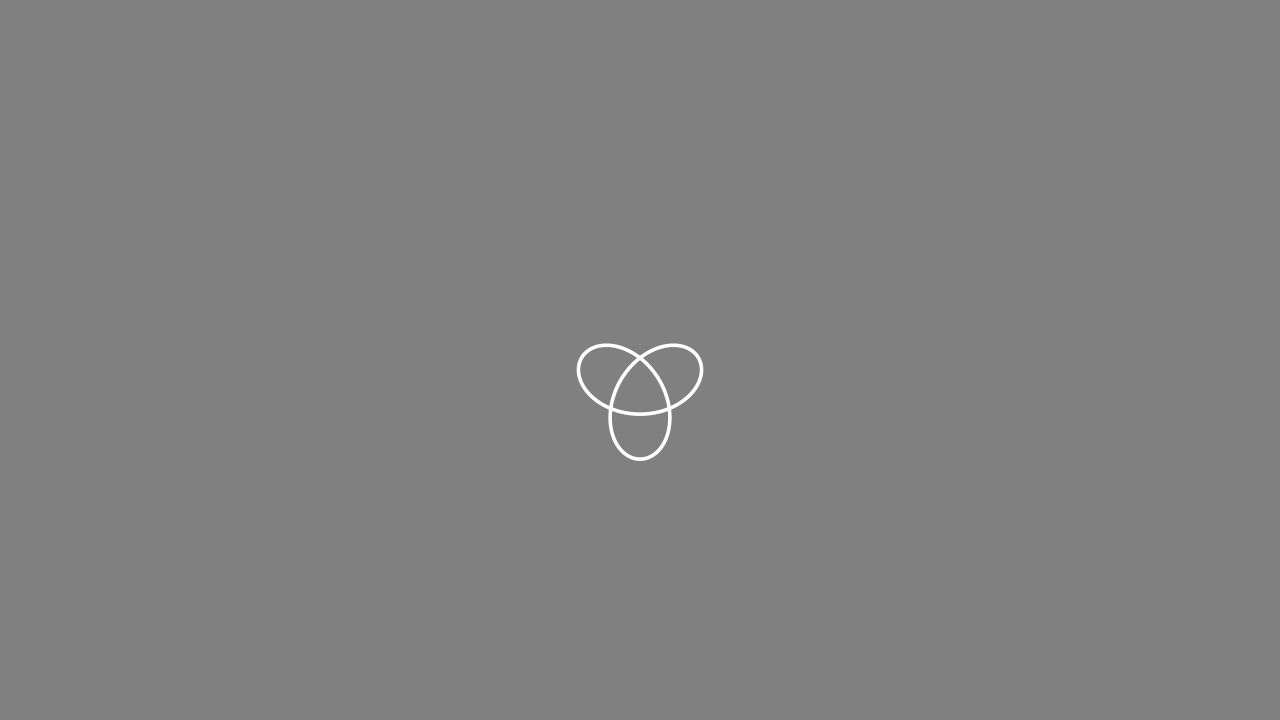

In [19]:
%%manim -qm TrefoilKnot

class TrefoilKnot(ThreeDScene):
    def construct(self):
        trefoil_knot = ParametricFunction(lambda t: np.array([
            np.sin(t) + 2 * np.sin(2 * t),
            np.cos(t) - 2 * np.cos(2 * t),
            0
        ]), [-3.5, 3.5])
        trefoil_knot.scale(0.25)

        # self.set_camera_orientation(theta=-45 * DEGREES, phi=60 * DEGREES)
        self.add(trefoil_knot)

In [24]:
%%manim -qm TrefoilarMovingDot

class TrefoilarMovingDot(ThreeDScene):
    def construct(self):
        trefoil_knot = ParametricFunction(lambda t: np.array([
            np.sin(t) + 2 * np.sin(2 * t),
            np.cos(t) - 2 * np.cos(2 * t),
            0
        ]), [-3.5, 3.5])
        trefoil_knot.scale(0.25)

        dot = Dotdot = Dot(color=ORANGE, stroke_width=5, fill_opacity=0.5)
        dot.scale(1)

        # uncomment this if you want the knot to be invisible and still
        # have movement of the dot in trefoilar motion
        self.add(trefoil_knot)
        self.play(MoveAlongPath(dot, trefoil_knot), rate_func=linear, run_time=5)

In [28]:
%%manim -qm QuadrifoliarMovingDot

class QuadrifoliarMovingDot(ThreeDScene):
    def construct(self):
        # note that increasing k to 3 will make it a trefoilar knot
        # to 4 will make it a knot with 8 "rays" to 5 will make it
        # a cinquefoil knot to 6 will make it a knot with 12 "rays"
        # and so on. So this parametric function can be generalized
        # not only to a trefoil, quadrifolium, and cinquefoil knots
        k = 2
        knot = ParametricFunction(lambda t: np.array([
            np.cos(k * t) * np.cos(t),
            np.cos(k * t) * np.sin(t),
            0
        ]), [-3.5, 3.5])
        knot.scale(.5)

        dot = Dotdot = Dot(color=ORANGE, stroke_width=5, fill_opacity=0.5)
        dot.scale(1)

        # uncomment this if you want the knot to be invisible and still
        # have movement of the dot in trefoilar motion
        self.add(knot)
        self.play(MoveAlongPath(dot, knot), rate_func=linear, run_time=5)

In [30]:
%%manim -qm QuadrifoliarMovingDotReversed

class QuadrifoliarMovingDotReversed(ThreeDScene):
    def construct(self):
        # note that increasing k to 3 will make it a trefoilar knot
        # to 4 will make it a knot with 8 "rays" to 5 will make it
        # a cinquefoil knot to 6 will make it a knot with 12 "rays"
        # and so on. So this parametric function can be generalized
        # not only to a trefoil, quadrifolium, and cinquefoil knots
        k = 2
        knot = ParametricFunction(lambda t: np.array([
            np.cos(k * t) * np.cos(t),
            np.cos(k * t) * np.sin(t),
            0
        ]), [-3.5, 3.5])
        knot.scale(.5)
        knot.reverse_points()

        dot = Dotdot = Dot(color=ORANGE, stroke_width=5, fill_opacity=0.5)
        dot.scale(1)

        # uncomment this if you want the knot to be invisible and still
        # have movement of the dot in trefoilar motion
        self.add(knot)
        self.play(MoveAlongPath(dot, knot), rate_func=linear, run_time=5)

In [8]:
%%manim -qm Graph9

class Graph9(ThreeDScene):
    def construct(self):
        edges = []
        partitions = []
        c = 0
        layers = [5, 4, 4, 3, 2, 3, 4, 4, 5]  # the number of neurons in each layer

        for n_nodes in layers:
            partitions.append(list(range(c + 1, c + n_nodes + 1)))
            c += n_nodes

        # create the edges of neural network
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        # create the nodes of the neural network
        vertices = np.arange(1, sum(layers) + 1)

        # note graph nodes start from 1 in this case
        graph = Graph(
            vertices,
            edges,
            layout='circular',
            layout_scale=5,
            vertex_config={
                'fill_color': BLUE,
                'fill_opacity': 0,
                'radius': 0.2,
                'stroke_width': 5,
                'stroke_color': WHITE,
                'stroke_opacity': 1
            },
            edge_config={
                'stroke_width': 2.5,
                'stroke_color': ORANGE,
                'stroke_opacity': 0.5
            }
        )

        dot = Dot()

        # make 34 instances of circle object the same number
        # as our graphs amount of nodes
        circles = [Circle() for _ in range(34)]
        for i in range(34):
            circles[i].scale(0.375)

        self.play(Create(dot))
        self.play(ReplacementTransform(dot, graph))
        
        
        self.play(graph.animate.change_layout('partite', partitions=partitions, layout_scale=5))

        # after graph transformation only then can we move the
        # circles first to the locatoin of the nodes and add them
        for i in range(34):
            circles[i].move_to(graph[i + 1].get_center())
        self.add(*circles)

        # once circle is moved to coordinates of the center of
        # a node move now the node to the right edge of this 
        # newly centered circle since mvoe along starts at the right
        # self.play(graph[1].animate.move_to(circles[0].get_right()))
        self.play(*[graph[i + 1].animate.move_to(circles[i].get_right()) for i in range(34)])

        # make sure circular motion is linear and not abrupt or
        # node movement will look unnatural
        # self.play(MoveAlongPath(graph[1], circles[0]), rate_func=linear)
        self.play(*[MoveAlongPath(graph[i + 1], circles[i]) for i in range(34)], rate_func=linear, run_time=2)
        
        

In [53]:
%%manim -qm MLAndDL5

class MLAndDL5(ThreeDScene):
    def construct(self):
        # Theta * X + Beta
        linear_func = MathTex(r"h_\Theta(X) = \sigma(\Theta X + \mathrm{B})")
        whole_op = MathTex(r"""
            h_\Theta(X) = 
            \sigma(\begin{bmatrix}
            \Theta^{(0)}_{1, 1} & \Theta^{(0)}_{1, 2} & \Theta^{(0)}_{1, 3}\\
            \Theta^{(0)}_{2, 1} & \Theta^{(0)}_{2, 2} & \Theta^{(0)}_{2, 3}\\
            \Theta^{(0)}_{3, 1} & \Theta^{(0)}_{3, 2} & \Theta^{(0)}_{3, 3}\\
            \Theta^{(0)}_{4, 1} & \Theta^{(0)}_{4, 2} & \Theta^{(0)}_{4, 3}\\
            \end{bmatrix}
            \cdot
            \begin{bmatrix}
            X^{(0)}_1 & X^{(1)}_1 & \cdots & X^{(m - 1)}_1 \\
            X^{(0)}_2 & X^{(1)}_2 & \cdots & X^{(m - 1)}_2 \\
            X^{(0)}_3 & X^{(1)}_3 & \cdots & X^{(m - 1)}_3 \\
            \end{bmatrix}
            +
            \begin{bmatrix}
            \mathrm{B}^{(0)}_{1, 0} \\
            \mathrm{B}^{(0)}_{2, 0} \\
            \mathrm{B}^{(0)}_{3, 0} \\
            \mathrm{B}^{(0)}_{4, 0} \\
            \end{bmatrix})
        """)
        whole_op.scale(0.75)

        edges = []
        partitions = []
        c = 0
        layers = [5, 4, 4, 3, 2, 3, 4, 4, 5]  # the number of neurons in each layer

        for n_nodes in layers:
            partitions.append(list(range(c + 1, c + n_nodes + 1)))
            c += n_nodes

        # create the edges of neural network
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        # create the nodes of the neural network
        vertices = np.arange(1, sum(layers) + 1)

        # note graph nodes start from 1 in this case
        graph = Graph(
            vertices,
            edges,
            layout='circular',
            layout_scale=0.0075,
            vertex_config={
                'fill_color': BLUE,
                'fill_opacity': 0,
                'radius': 0.2,
                'stroke_width': 5,
                'stroke_color': WHITE,
                'stroke_opacity': 1
            },
            edge_config={
                'stroke_width': 2.5,
                'stroke_color': WHITE,
                'stroke_opacity': 0.75
            }
        )

        dot = Dot(color=WHITE, stroke_width=5, fill_opacity=0)
        dot.scale(2.5)
        
        self.play(Write(linear_func))
        self.wait(1)
        self.play(ReplacementTransform(linear_func, whole_op))
        self.wait(1)
        self.play(ReplacementTransform(whole_op, dot))
        self.play(ReplacementTransform(dot, graph), run_time=0.0001)
        self.play(*[graph.animate.change_layout('partite', partitions=partitions, layout_scale=5)])
        
        # animate the nodes of the first layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]], run_time=0.125)


        # animate the edges of the first layer and remove animation of nodes in first layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [1, 2, 3, 4, 5]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        (2, 6), (2, 7), (2, 8), (2, 9),
        (3, 6), (3, 7), (3, 8), (3, 9),
        (4, 6), (4, 7), (4, 8), (4, 9),
        (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.125)
        
        # animate the nodes of the second layer and remove animation of edges in the first layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(1, 6), (1, 7), (1, 8), (1, 9), 
        (2, 6), (2, 7), (2, 8), (2, 9),
        (3, 6), (3, 7), (3, 8), (3, 9),
        (4, 6), (4, 7), (4, 8), (4, 9),
        (5, 6), (5, 7), (5, 8), (5, 9),]], run_time=0.125)


        # animate the edges of the second layer and remove animation of nodes in second layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [6, 7, 8, 9]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        (7, 10), (7, 11), (7, 12), (7, 13),
        (8, 10), (8, 11), (8, 12), (8, 13),
        (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.125)

        # animate the nodes of the third layer and remove animation of edges in the second layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(6, 10), (6, 11), (6, 12), (6, 13), 
        (7, 10), (7, 11), (7, 12), (7, 13),
        (8, 10), (8, 11), (8, 12), (8, 13),
        (9, 10), (9, 11), (9, 12), (9, 13),]], run_time=0.125)


        # animate the edges of the third layer and remove animation of nodes in third layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [10, 11, 12, 13]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(10, 14), (10, 15), (10, 16), 
        (11, 14), (11, 15), (11, 16),
        (12, 14), (12, 15), (12, 16),
        (13, 14), (13, 15), (13, 16),]], run_time=0.125)

        # animate the nodes of the 4th layer and remove animation of edges in the third layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(10, 14), (10, 15), (10, 16), 
        (11, 14), (11, 15), (11, 16),
        (12, 14), (12, 15), (12, 16),
        (13, 14), (13, 15), (13, 16),]], run_time=0.125)


        # animate the edges of the 4th layer and remove animation of nodes in 4th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [14, 15, 16]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(14, 17), (14, 18), 
        (15, 17), (15, 18),
        (16, 17), (16, 18),]], run_time=0.125)

        # animate the nodes of the 5th layer and remove animation of edges in the 4th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(14, 17), (14, 18), 
        (15, 17), (15, 18),
        (16, 17), (16, 18),]], run_time=0.125)


        # animate the edges of the 5th layer and remove animation of nodes in 5th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [17, 18]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(17, 19), (17, 20), (17, 21),
        (18, 19), (18, 20), (18, 21),]], run_time=0.125)

        # animate the nodes of the 6th layer and remove animation of edges in the 5th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(17, 19), (17, 20), (17, 21),
        (18, 19), (18, 20), (18, 21),]], run_time=0.125)


        # animate the edges of the 6th layer and remove animation of nodes in 6th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [19, 20, 21]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        (20, 22), (20, 23), (20, 24), (20, 25),
        (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.125)

        # animate the nodes of the 7th layer and remove animation of edges in the 6th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(19, 22), (19, 23), (19, 24), (19, 25),
        (20, 22), (20, 23), (20, 24), (20, 25),
        (21, 22), (21, 23), (21, 24), (21, 25),]], run_time=0.125)


        # animate the edges of the 7th layer and remove animation of nodes in 7th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [22, 23, 24, 25]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        (23, 26), (23, 27), (23, 28), (23, 29),
        (24, 26), (24, 27), (24, 28), (24, 29),
        (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.125)

        # animate the nodes of the 8th layer and remove animation of edges in the 7th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(22, 26), (22, 27), (22, 28), (22, 29),
        (23, 26), (23, 27), (23, 28), (23, 29),
        (24, 26), (24, 27), (24, 28), (24, 29),
        (25, 26), (25, 27), (25, 28), (25, 29),]], run_time=0.125)


        # animate the edges of the 8thth layer and remove animation of nodes in 8th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [26, 27, 28, 29]] + 
        [line.animate.set_stroke('#1d58e0', opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.125)

        # animate the nodes of the 9th layer and remove animation of edges in the 8th layer
        self.play(*[graph[node].animate.set_stroke('#1d58e0', opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]] + 
        [line.animate.set_stroke(WHITE, opacity=0.75, width=2.5) for edge, line in graph.edges.items()
        if edge in [(26, 30), (26, 31), (26, 32), (26, 33), (26, 34),
        (27, 30), (27, 31), (27, 32), (27, 33), (27, 34),
        (28, 30), (28, 31), (28, 32), (28, 33), (28, 34),
        (29, 30), (29, 31), (29, 32), (29, 33), (29, 34),]], run_time=0.125)


        # remove animation of nodes in 9th layer
        self.play(*[graph[node].animate.set_stroke(WHITE, opacity=1, width=5) for node in graph.vertices if node in [30, 31, 32, 33, 34]], run_time=0.125)

In [61]:
%%manim -qm MLAndDL6

class MLAndDL6(ThreeDScene):
    def construct(self):
        # Theta * X + Beta
        linear_func = MathTex(r"h_\Theta(X) = \mathrm{A}^{(L - 1)} = \sigma(\Theta^{(L - 2)} \cdots \sigma(\Theta^{(0)} X + \mathrm{B}^{(0)}) + \mathrm{B}^{(L - 2)})")
        whole_op = MathTex(r"""
            h_\Theta(X) = 
            A^{(L - 1)} = 
            \sigma(\begin{bmatrix}
                \Theta^{(L - 2)}_{1, 1} & \Theta^{(L - 2)}_{1, 2} & \cdots & \Theta^{(L - 2)}_{1, n^{(L - 2)}} \\
                \Theta^{(L - 2)}_{2, 1} & \Theta^{(L - 2)}_{2, 2} & \cdots & \Theta^{(L - 2)}_{2, n^{(L - 2)}} \\
                \vdots & \vdots & \ddots & \vdots \\
                \Theta^{(L - 2)}_{n^{(L - 1)}, 1} & \Theta^{(L - 2)}_{n^{(L - 1)}, 2} & \cdots & \Theta^{(L - 2)}_{n^{(L - 1)}, n^{(L - 2)}} \\
            \end{bmatrix} \\
            \cdots
            \sigma(\begin{bmatrix}
                    \Theta^{(0)}_{1, 1} & \Theta^{(0)}_{1, 2} & \cdots & \Theta^{(0)}_{1, n^{(0)}} \\
                    \Theta^{(0)}_{2, 1} & \Theta^{(0)}_{2, 2} & \cdots & \Theta^{(0)}_{2, n^{(0)}} \\
                    \vdots & \vdots & \ddots & \vdots \\
                    \Theta^{(0)}_{n^{(1)}, 1} & \Theta^{(0)}_{n^{(1)}, 2} & \cdots & \Theta^{(0)}_{n^{(1)}, n^{(0)}} \\
                    \end{bmatrix}
                    \cdot
                    \begin{bmatrix}
                    X^{(0)}_1 & X^{(1)}_1 & \cdots & X^{(m - 1)}_1 \\
                    X^{(0)}_2 & X^{(1)}_2 & \cdots & X^{(m - 1)}_2 \\
                    \vdots & \vdots & \ddots & \vdots \\
                    X^{(0)}_n & X^{(1)}_n & \cdots & X^{(m - 1)}_n \\
                    \end{bmatrix}
                    +
                    \begin{bmatrix}
                    \mathrm{B}^{(0)}_{1, 0} \\
                    \mathrm{B}^{(0)}_{2, 0} \\
                    \vdots \\
                    \mathrm{B}^{(0)}_{n^{(1)}, 0} \\
                \end{bmatrix}) \\
            +
            \begin{bmatrix}
            \mathrm{B}^{(L - 2)}_{1, 0} \\
            \mathrm{B}^{(L - 2)}_{2, 0} \\
            \vdots \\
            \mathrm{B}^{(L - 2)}_{n^{(L - 1)}, 0} \\
            \end{bmatrix})
        """)
        whole_op.scale(0.75)

        self.play(Write(linear_func))
        self.play(ReplacementTransform(linear_func, whole_op))